In [1]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams.update({'figure.autolayout': True})
font = {'size': 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
import pandas as pd

In [3]:
def same_result(row):
    res = False
    if row['norm_score'] < 0 and row['norm_liwc'] < 0:
        res = True
    if row['norm_score'] > 0 and row['norm_liwc'] > 0:
        res = True
    if row['norm_score'] == 0 and row['norm_liwc'] == 0:
        res = True
    return res

###a) 1)

In [4]:
df_a1 = pd.read_csv('results_subtraction_100.csv')

In [5]:
df_a1['same'] = df_a1.apply(same_result, axis=1)
total = df_a1.same.count()
equals = df_a1[df_a1.same == True].count()['same']
different = df_a1[df_a1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7341797b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f73414aa5d0>]], dtype=object)

/home/antonio/.virtualenvs/lexisnexis/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


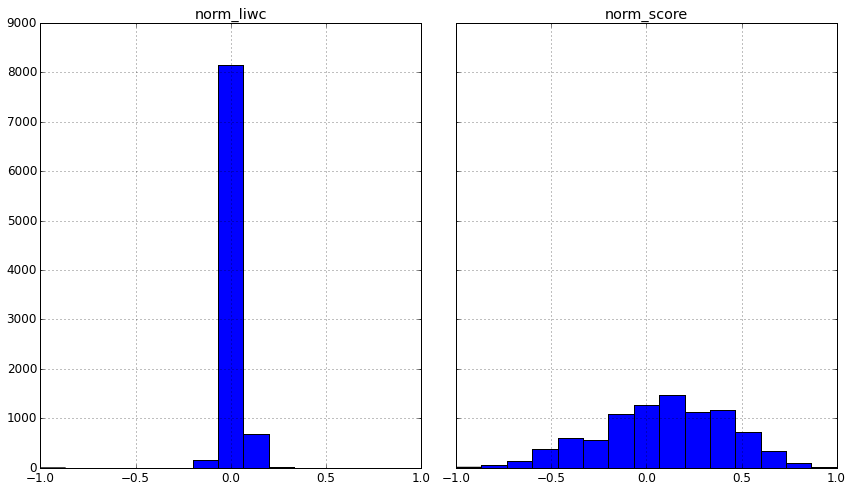

In [6]:
df_a1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

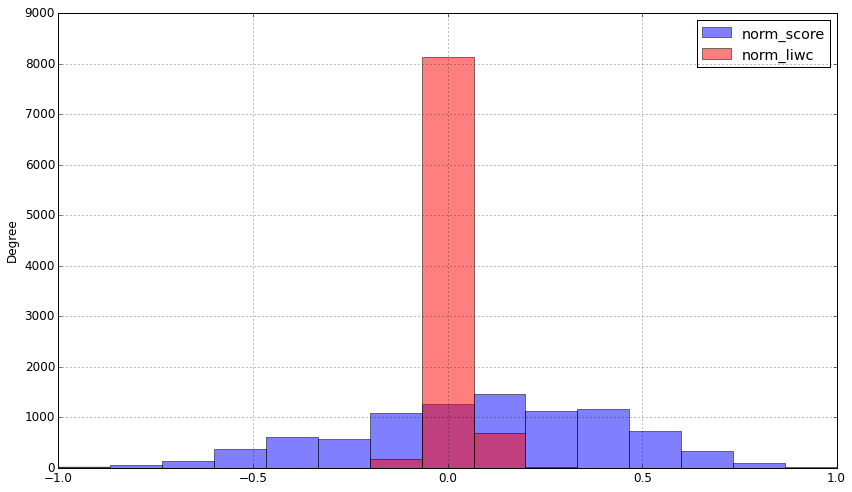

In [7]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

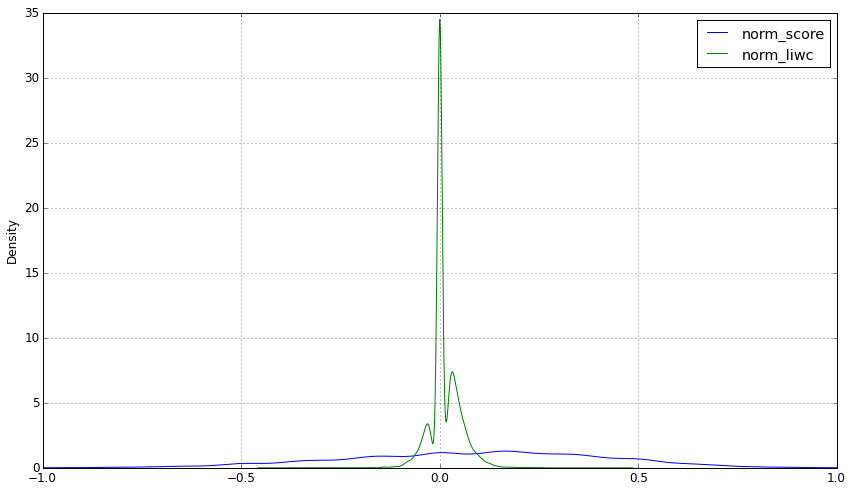

In [8]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###a) 2)

In [9]:
df_a2 = pd.read_csv('results_minmax_100.csv')

In [10]:
df_a2['same'] = df_a2.apply(same_result, axis=1)
total = df_a2.same.count()
equals = df_a2[df_a2.same == True].count()['same']
different = df_a2[df_a2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73410ed610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7327913410>]], dtype=object)

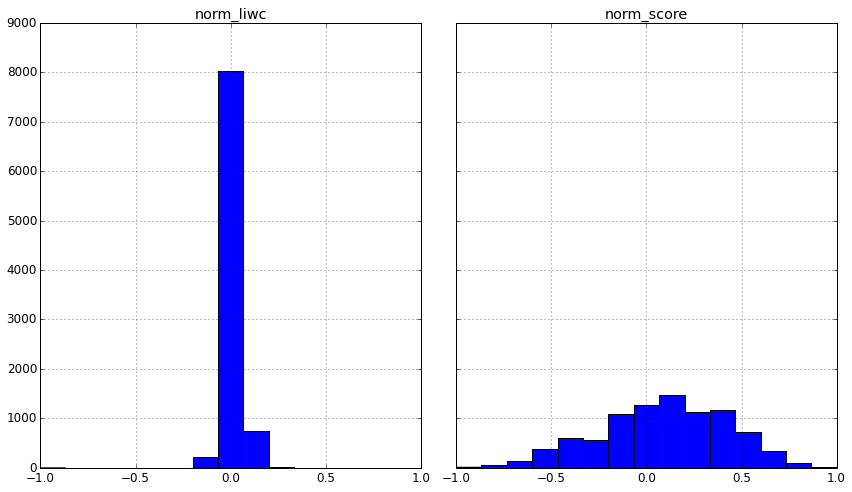

In [11]:
df_a2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

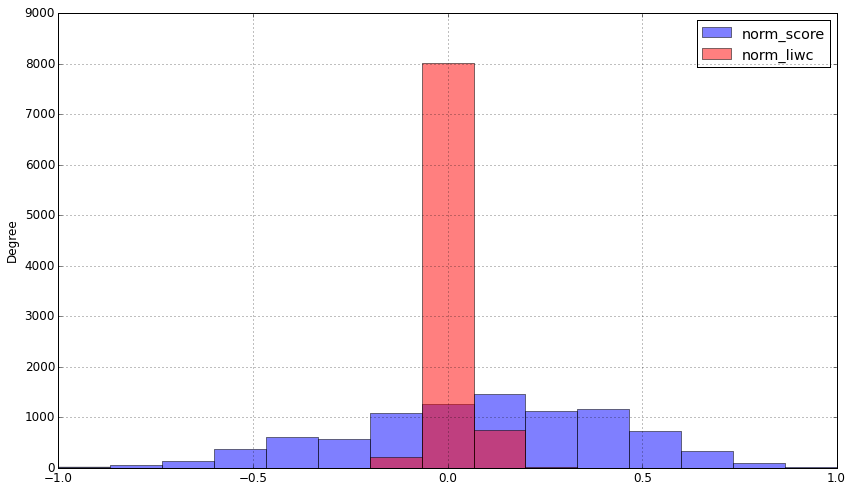

In [12]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

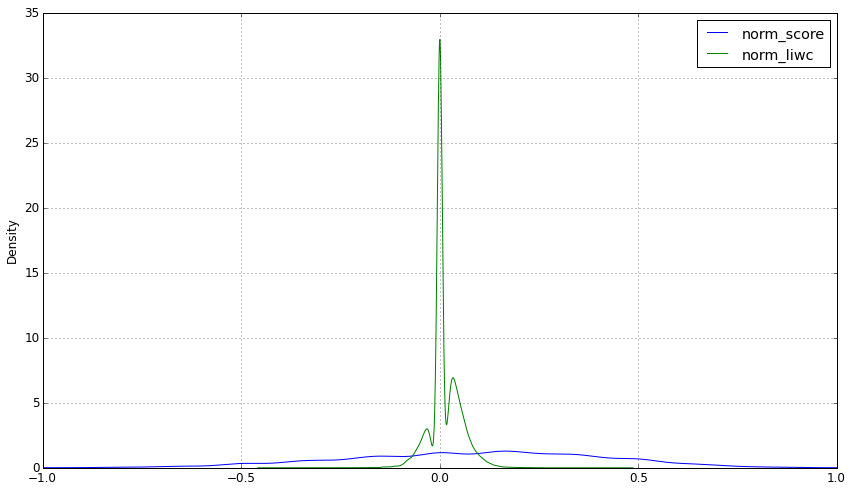

In [13]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 1)

In [14]:
df_b1 = pd.read_csv('results_subtraction_minmax.csv')

In [15]:
df_b1['same'] = df_b1.apply(same_result, axis=1)
total = df_b1.same.count()
equals = df_b1[df_b1.same == True].count()['same']
different = df_b1[df_b1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73273fb5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7327299f90>]], dtype=object)

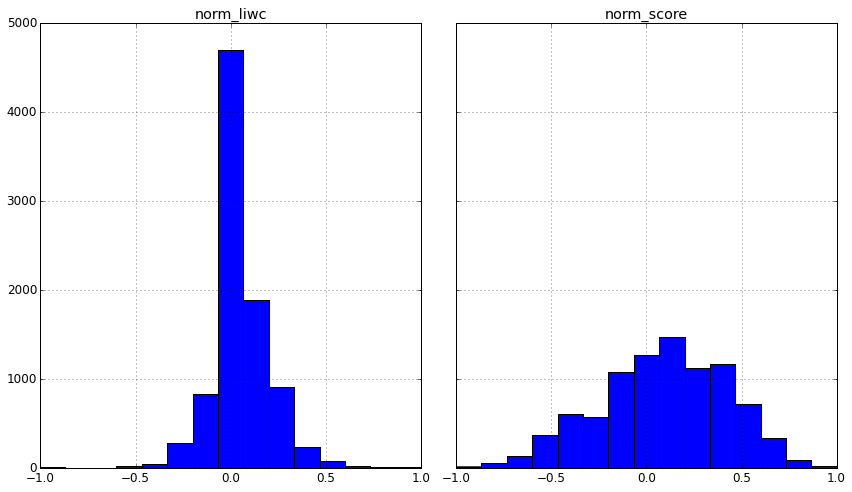

In [16]:
df_b1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

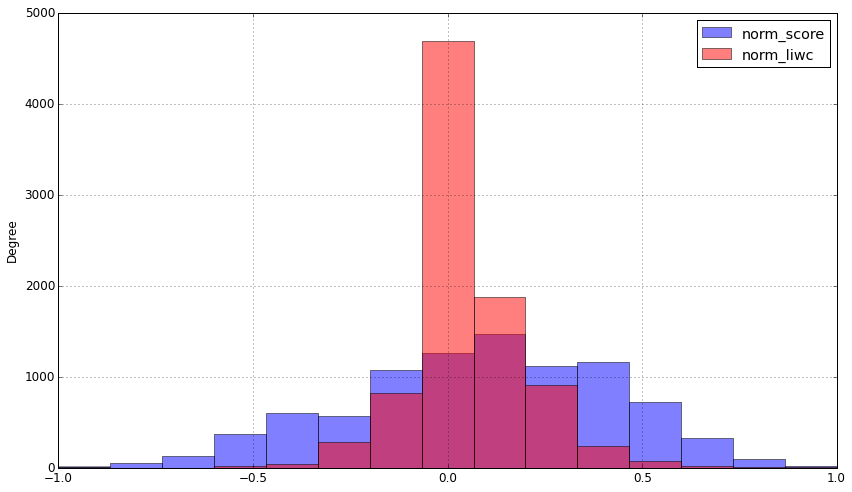

In [17]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

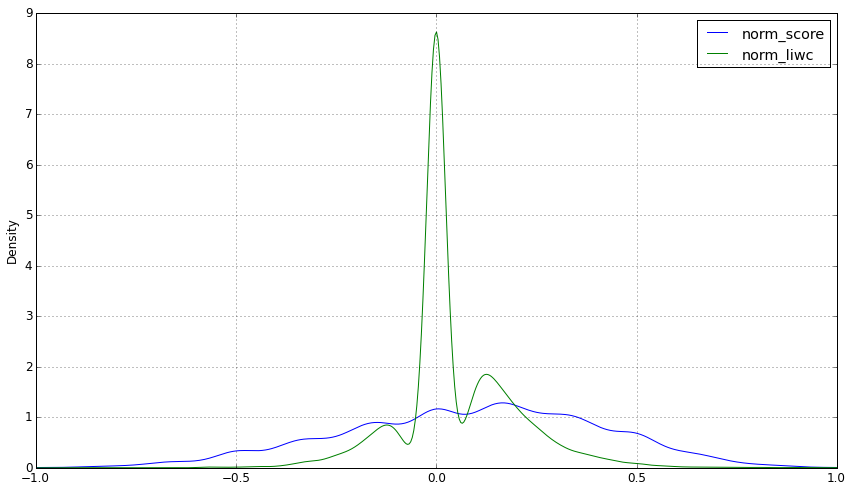

In [18]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 2)

In [19]:
df_b2 = pd.read_csv('results_minmax_minmax.csv')

In [20]:
df_b2['same'] = df_b2.apply(same_result, axis=1)
total = df_b2.same.count()
equals = df_b2[df_b2.same == True].count()['same']
different = df_b2[df_b2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7326d2e410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7326ccbdd0>]], dtype=object)

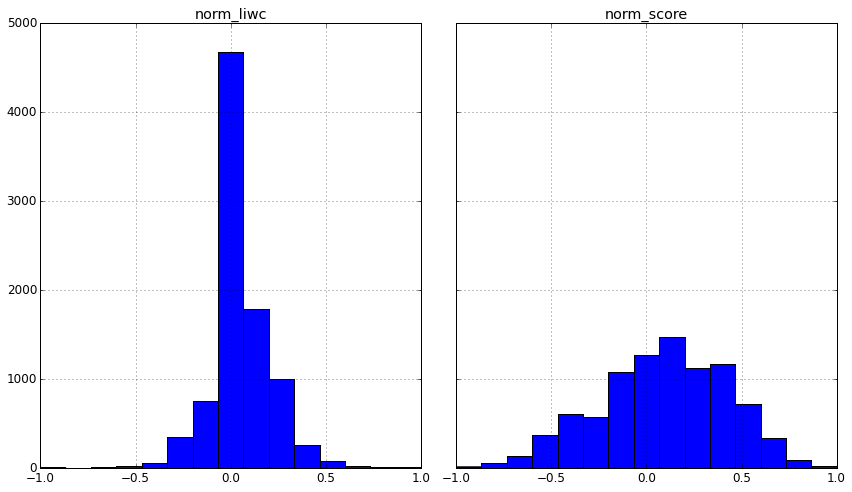

In [21]:
df_b2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

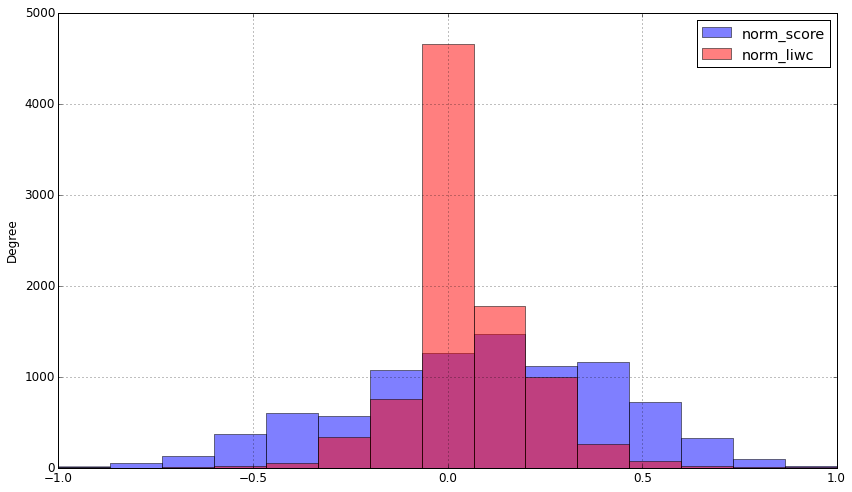

In [22]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

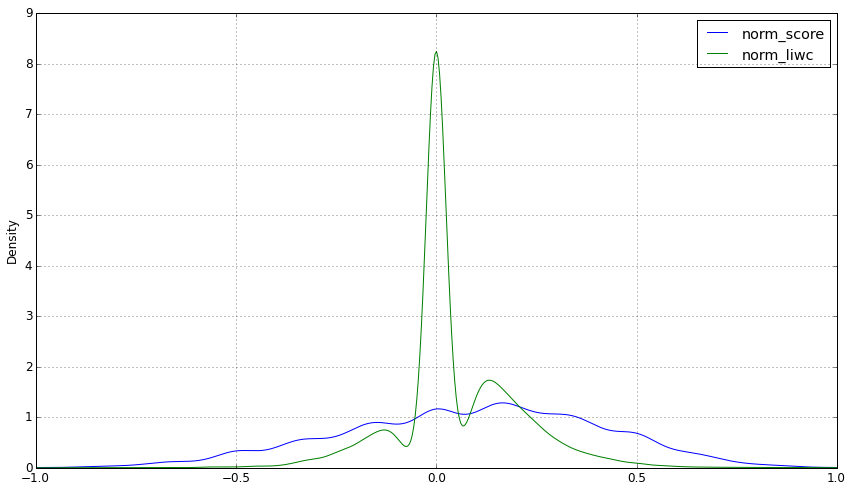

In [23]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])